### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
import numpy as np

In [2]:
vehicle= pd.read_csv("vehicle.csv").dropna()

In [3]:
vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

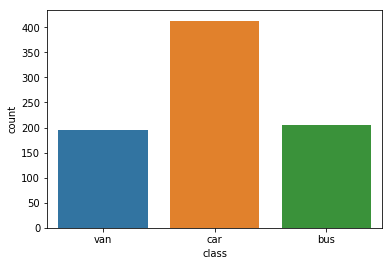

In [5]:
sns.countplot(x='class',data=vehicle)

### Check for any missing values in the data 

In [6]:
vehicle.isnull().values.any()

False

### 3. Standardize the data 

In [7]:
from sklearn import preprocessing

In [8]:
X_scaled = preprocessing.scale(vehicle.iloc[:,:-1])

In [9]:
vehicle.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [10]:
X_scaled= pd.DataFrame(X_scaled)
X_scaled.columns=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [11]:
distortion={}

You can later use this array to plot the elbow plot

In [12]:
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### 5. Calculating distortion - C distance

In [13]:
from sklearn.cluster import KMeans

In [14]:
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_scaled)
    X_scaled["clusters"] = kmeans.labels_
    distortion[k] = kmeans.inertia_ 

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [15]:
distortion

{1: 14634.0,
 2: 8623.13697598644,
 3: 7057.098818359817,
 4: 5745.991457037496,
 5: 5267.062727435437,
 6: 4825.6017933354315,
 7: 4464.663818487033,
 8: 4156.9187754886425,
 9: 3952.986989904261}

### 6. Plotting Elbow/ Scree Plot

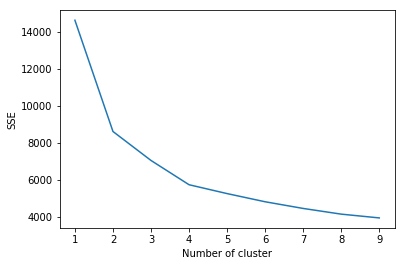

In [16]:
plt.figure()
plt.plot(list(distortion.keys()), list(distortion.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [18]:
#Elbow plost has the optimal value of K as 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [19]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.529982,0.033184,-0.225515,-0.432448,-0.009754,0.036067,-0.419827,0.305736,-0.428013,0.130379,-0.402145,-0.474260,0.062374,0.051120,-0.067228,-0.429914,-0.392805,-0.186265,2.007042e+00
1,0.842284,0.611799,0.983833,1.004696,0.273746,0.125194,0.798551,-0.922051,0.758417,0.453455,0.788840,0.763170,0.520484,-0.552484,-0.010885,0.130394,0.565384,0.602472,6.956140e+00
2,-0.043744,-0.700518,-0.159243,0.320550,0.403770,-0.226762,-0.207260,-0.029636,-0.283987,-0.708261,-0.159360,-0.241961,-0.739434,-0.664167,-0.224010,0.383547,1.029840,0.829022,6.000000e+00
3,1.243156,1.462618,1.323827,1.003723,0.141390,0.422896,1.437994,-1.299323,1.467921,1.481256,1.215936,1.439464,1.264347,-0.075812,0.305844,0.376382,-0.181378,0.249703,1.000000e+00
4,-1.161741,-0.266411,-0.893824,-1.106773,-0.503385,-0.359915,-0.573236,0.549952,-0.616816,-0.287639,-0.555252,-0.633344,0.025294,1.294228,-0.288959,-0.435133,-1.376479,-1.554359,2.861111e+00
5,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,5.000000e+00
6,-0.446806,-0.970492,-0.809956,-0.633332,-0.243876,-0.221351,-1.021158,1.078031,-0.983326,-0.834707,-1.004235,-0.942753,-1.045328,-0.906925,0.105623,-0.206916,1.114262,0.889550,2.664535e-15
7,1.640988,1.640404,1.247480,0.624550,-0.699654,-0.624482,2.297412,-1.752746,2.380453,1.326477,2.546093,2.538770,2.054571,1.440192,-0.022727,0.308517,-0.907185,-1.570062,4.000000e+00
8,-0.941188,-1.123594,-1.289500,-1.342752,-0.840600,-0.570129,-1.136819,1.413342,-1.037609,-1.159228,-1.195111,-1.061984,-0.986236,0.806920,0.131793,-0.068448,-1.116962,-1.278656,3.000000e+00


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [20]:
kmeans.cluster_centers_[4,]

array([-1.16174141, -0.26641119, -0.89382389, -1.1067731 , -0.50338492,
       -0.35991494, -0.57323603,  0.54995248, -0.61681558, -0.28763906,
       -0.55525241, -0.63334368,  0.02529355,  1.29422821, -0.28895862,
       -0.43513302, -1.37647889, -1.55435898,  2.86111111])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [23]:
centroids= kmeans.cluster_centers_[4,:]

Hint: Use pd.Dataframe function 

In [25]:
centroids= pd.DataFrame(centroids)

In [26]:
centroids= centroids.T

In [27]:
centroids=centroids.iloc[:,:-1]

In [28]:
centroids.columns= ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

### Use kmeans.labels_ function to print out the labels of the classes

In [29]:
X_scaledpred=X_scaled.iloc[:,:-1]

In [30]:
X_scaledpred.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [31]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaledpred)

In [32]:
X_scaledpred['ClusterID']= kmeans.predict(X_scaledpred[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']])

In [35]:
X_scaledpred.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,ClusterID
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,2
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,2
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,0
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,2
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,3


In [36]:
kmeans.labels_

array([2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 3, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0,
       2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0,
       1, 1, 0, 1, 3, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 3, 1, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       2, 0, 1, 2, 3, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1,